In [10]:
import pandas as pd
import numpy as np

import datetime as dt

# Data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [ ]:
#weekly, monthly, annual
#or
#days, months, years

def seasonal_plot(dates, values, type='days'):
    


In [29]:

values

0       3.526591
1       3.180891
2       3.252221
3       3.611003
4       3.565869
         ...    
199    21.654285
200    18.264945
201    23.107677
202    22.912510
203    19.431740
Name: value, Length: 204, dtype: float64

In [9]:
def side_by_side_datetime_boxplots(dates, values, figsize, date_type):
    
    """
    Creates side-by-side boxplots.
    """

    if date_type=='days':
        day_names = df['date'].dt.day_name()
    data = pd.DataFrame({'day_name':day_names, 'values':values})
    data = data.pivot(columns='day_name', values = 'values')
    col_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    data = data[col_names]
    ax = data.boxplot(
        figsize=(7,5),
        grid=False,
        return_type='axes'
    )
    
    
    return ax

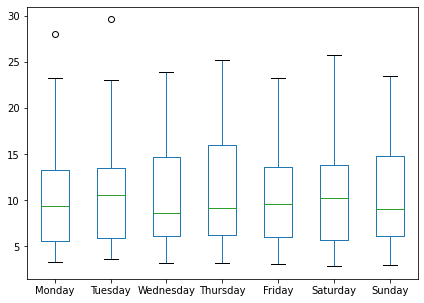

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

values = df['value']
dates = df['date']
figsize = (7,7)
date_type = 'days'


ax1 = side_by_side_datetime_boxplots(
    dates=dates,
    values=values,
    figsize=figsize,
    date_type='days'
)



<BarContainer object of 7 artists>

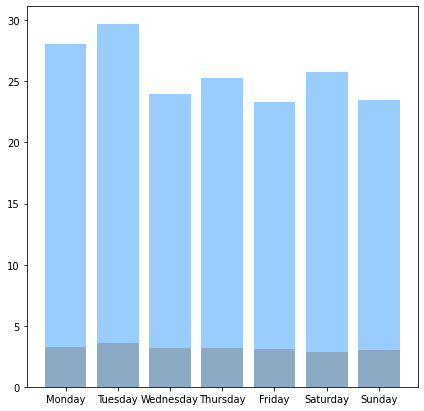

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

values = df['value']
dates = df['date']
figsize = (7,7)
type = 'days'


if type=='days':
    day_names = df['date'].dt.day_name()

data = pd.DataFrame({'day_names':day_names, 'values':values})
data = data.groupby(by=['day_names'], dropna=False).agg(
    minimum = pd.NamedAgg(column='values', aggfunc='min'),
    maximum = pd.NamedAgg(column='values', aggfunc='max'),
    mean = pd.NamedAgg(column='values', aggfunc=np.mean)
).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

fig, ax = plt.subplots(figsize=figsize)
ax.bar(x=data.index, height=data.maximum, color='dodgerblue',alpha=0.45, label='Max Values')
ax.bar(x=data.index, height=data.minimum, color='grey',alpha=0.45, label='Min Values')

In [90]:
data = pd.DataFrame({'day_name':day_names, 'values':values})
data

,day_name,values
0,Monday,3.526591
1,Thursday,3.180891
2,Sunday,3.252221
3,Tuesday,3.611003
4,Friday,3.565869
...,...,...
199,Friday,21.654285
200,Saturday,18.264945
201,Tuesday,23.107677
202,Thursday,22.912510


In [4]:
data = pd.DataFrame({'day_name':day_names, 'values':values})
data = data.pivot(columns='day_name', values = 'values')
ax = data.boxplot(figsize=(10,10))

NameError: name 'day_names' is not defined

Friday


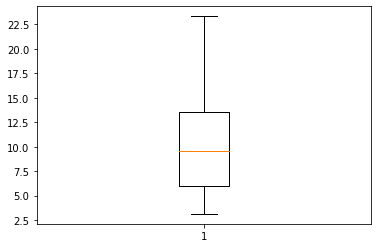

Monday


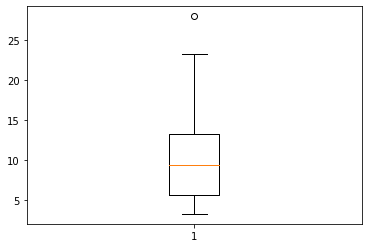

Saturday


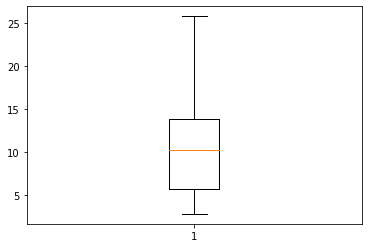

Sunday


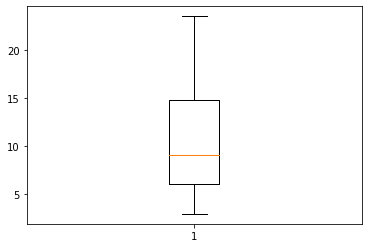

Thursday


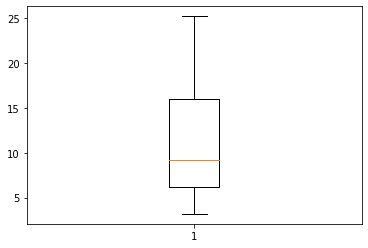

Tuesday


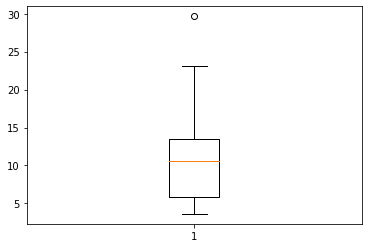

Wednesday


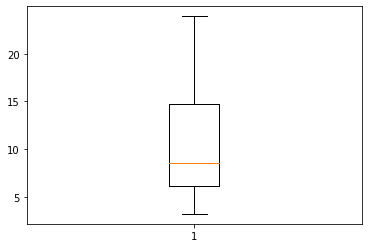

In [98]:

for col in data.columns:
    vals = data[col].dropna()
    print(col)
    plt.boxplot(vals)
    plt.show()

In [ ]:
plt.boxplot(data[col])

In [83]:
data = pd.DataFrame({'day_name':day_names, 'values':values})
data_dict = {}
for day in data.day_name.unique():
    x_vals = data.loc[data.day_name==day].set_index('day_name')
    data_dict[day]=x_vals
data = pd.DataFrame(data_dict)
data

ValueError: If using all scalar values, you must pass an index

In [81]:
x_vals


,day_name,values
0,Monday,3.526591
11,Monday,3.270523
19,Monday,3.450857
20,Monday,3.772307
28,Monday,5.093841
37,Monday,5.350605
46,Monday,5.194754
54,Monday,8.329452
57,Monday,5.597126
60,Monday,6.486849


In [14]:
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [ ]:
def seasonal_plot(dates, values):
    
    